In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

import pandas as pd
import pickle as pkl

from hepstats.modeling import bayesian_blocks

In [2]:
path_to_usdb_csv = './sd_GT_complete.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [3]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq_gt/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq_gt/usdb.vec',skiprows=1)

In [4]:
n_transitions = len(df_usdb[df_usdb['include']==True])
print('# transitions =', n_transitions)

# transitions = 56


In [5]:
gA = 1.28

df_usdb['Bth_gA2'] = df_usdb['Bth']*gA**2
df_usdb['Berr_gA2'] = df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror']
df_usdb['Berr'] = df_usdb['Bexp']-df_usdb['Bth']-1.0*df_usdb['Tmirror']


Simply using $g_A$ at the free-nucleon value, unquenched, we have this distribution of absolute errors for B(GT)

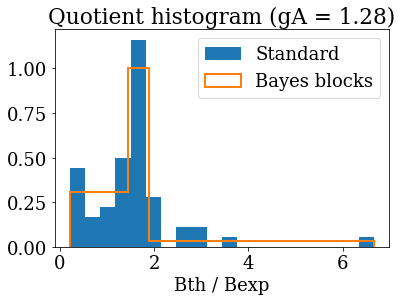

In [6]:
y = np.array(df_usdb['Bth_gA2'] / df_usdb['Bexp'])
blocks = bayesian_blocks(y)
plt.hist(y, bins=optimal_n_bins(y), density=True, label='Standard')
plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
plt.title(f'Quotient histogram (gA = {gA})')
plt.xlabel('Bth / Bexp')
plt.legend()
plt.show()

In [7]:
from scipy.optimize import minimize

def objective(dBap,q,df):
    chi_squared = np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2)) 
    dof = n_transitions - 1
    return (chi_squared/dof - 1)**2

dBap = minimize(objective,x0=0.5,args=(0.77,df_usdb)).x[0]

In [8]:
print('a priori B(GT) std. dev. =', dBap)
print('a priori B(GT) variance =', dBap**2)

a priori B(GT) std. dev. = -0.08135511646323804
a priori B(GT) variance = 0.006618654974747024


In [9]:
df_usdb['Bresid'] = df_usdb['Berr']/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)
df_usdb['Bresid_gA2'] = (df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror'])/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)

In [10]:
data_path = '/p/lustre2/fox39/shmuq_gt/batch_results'
run_dir_list = []
for batch_dir in sorted(glob(os.path.join(data_path,'batch_job*'))):
#     print(batch_dir)
    for run_dir in sorted(glob(os.path.join(batch_dir,'run_usdb_rand?????'))):
        run_dir_list.append(run_dir)
        print(run_dir)

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00001/run_usdb_rand00001
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00001/run_usdb_rand00002
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00001/run_usdb_rand00003
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00001/run_usdb_rand00004
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00002/run_usdb_rand00005
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00002/run_usdb_rand00006
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00002/run_usdb_rand00007
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00002/run_usdb_rand00008
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00003/run_usdb_rand00009
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00003/run_usdb_rand00010
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00003/run_usdb_rand00011
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00003/run_usdb_rand00012
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00004/run_usdb_rand00013
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00036/run_usdb_rand00141
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00036/run_usdb_rand00142
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00036/run_usdb_rand00143
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00036/run_usdb_rand00144
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00037/run_usdb_rand00145
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00037/run_usdb_rand00146
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00037/run_usdb_rand00147
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00037/run_usdb_rand00148
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00038/run_usdb_rand00149
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00038/run_usdb_rand00150
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00038/run_usdb_rand00151
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00038/run_usdb_rand00152
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00039/run_usdb_rand00153
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00083/run_usdb_rand00329
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00083/run_usdb_rand00330
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00083/run_usdb_rand00331
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00083/run_usdb_rand00332
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00084/run_usdb_rand00333
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00084/run_usdb_rand00334
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00084/run_usdb_rand00335
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00084/run_usdb_rand00336
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00085/run_usdb_rand00337
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00085/run_usdb_rand00338
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00085/run_usdb_rand00339
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00085/run_usdb_rand00340
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00086/run_usdb_rand00341
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00128/run_usdb_rand00509
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00128/run_usdb_rand00510
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00128/run_usdb_rand00511
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00128/run_usdb_rand00512
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00129/run_usdb_rand00513
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00129/run_usdb_rand00514
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00129/run_usdb_rand00515
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00129/run_usdb_rand00516
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00130/run_usdb_rand00517
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00130/run_usdb_rand00518
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00130/run_usdb_rand00519
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00130/run_usdb_rand00520
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00131/run_usdb_rand00521
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00172/run_usdb_rand00685
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00172/run_usdb_rand00686
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00172/run_usdb_rand00687
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00172/run_usdb_rand00688
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00173/run_usdb_rand00689
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00173/run_usdb_rand00690
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00173/run_usdb_rand00691
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00173/run_usdb_rand00692
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00174/run_usdb_rand00693
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00174/run_usdb_rand00694
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00174/run_usdb_rand00695
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00174/run_usdb_rand00696
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00175/run_usdb_rand00697
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00217/run_usdb_rand00865
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00217/run_usdb_rand00866
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00217/run_usdb_rand00867
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00217/run_usdb_rand00868
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00218/run_usdb_rand00869
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00218/run_usdb_rand00870
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00218/run_usdb_rand00871
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00218/run_usdb_rand00872
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00219/run_usdb_rand00873
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00219/run_usdb_rand00874
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00219/run_usdb_rand00875
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00219/run_usdb_rand00876
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00220/run_usdb_rand00877
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00264/run_usdb_rand01053
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00264/run_usdb_rand01054
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00264/run_usdb_rand01055
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00264/run_usdb_rand01056
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00265/run_usdb_rand01057
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00265/run_usdb_rand01058
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00265/run_usdb_rand01059
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00265/run_usdb_rand01060
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00266/run_usdb_rand01061
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00266/run_usdb_rand01062
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00266/run_usdb_rand01063
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00266/run_usdb_rand01064
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00267/run_usdb_rand01065
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00312/run_usdb_rand01245
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00312/run_usdb_rand01246
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00312/run_usdb_rand01247
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00312/run_usdb_rand01248
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00313/run_usdb_rand01249
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00313/run_usdb_rand01250
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00313/run_usdb_rand01251
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00313/run_usdb_rand01252
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00314/run_usdb_rand01253
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00314/run_usdb_rand01254
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00314/run_usdb_rand01255
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00314/run_usdb_rand01256
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00315/run_usdb_rand01257
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00361/run_usdb_rand01441
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00361/run_usdb_rand01442
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00361/run_usdb_rand01443
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00361/run_usdb_rand01444
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00362/run_usdb_rand01445
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00362/run_usdb_rand01446
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00362/run_usdb_rand01447
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00362/run_usdb_rand01448
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00363/run_usdb_rand01449
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00363/run_usdb_rand01450
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00363/run_usdb_rand01451
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00363/run_usdb_rand01452
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00364/run_usdb_rand01453
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00409/run_usdb_rand01633
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00409/run_usdb_rand01634
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00409/run_usdb_rand01635
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00409/run_usdb_rand01636
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00410/run_usdb_rand01637
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00410/run_usdb_rand01638
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00410/run_usdb_rand01639
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00410/run_usdb_rand01640
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00411/run_usdb_rand01641
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00411/run_usdb_rand01642
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00411/run_usdb_rand01643
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00411/run_usdb_rand01644
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00412/run_usdb_rand01645
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00458/run_usdb_rand01829
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00458/run_usdb_rand01830
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00458/run_usdb_rand01831
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00458/run_usdb_rand01832
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00459/run_usdb_rand01833
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00459/run_usdb_rand01834
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00459/run_usdb_rand01835
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00459/run_usdb_rand01836
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00460/run_usdb_rand01837
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00460/run_usdb_rand01838
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00460/run_usdb_rand01839
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00460/run_usdb_rand01840
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00461/run_usdb_rand01841
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00509/run_usdb_rand02032
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00509/run_usdb_rand02033
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00509/run_usdb_rand02034
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00509/run_usdb_rand02035
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00510/run_usdb_rand02036
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00510/run_usdb_rand02037
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00510/run_usdb_rand02038
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00510/run_usdb_rand02039
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00511/run_usdb_rand02040
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00511/run_usdb_rand02041
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00511/run_usdb_rand02042
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00511/run_usdb_rand02043
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00512/run_usdb_rand02044
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00558/run_usdb_rand02228
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00558/run_usdb_rand02229
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00558/run_usdb_rand02230
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00558/run_usdb_rand02231
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00559/run_usdb_rand02232
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00559/run_usdb_rand02233
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00559/run_usdb_rand02234
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00559/run_usdb_rand02235
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00560/run_usdb_rand02236
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00560/run_usdb_rand02237
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00560/run_usdb_rand02238
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00560/run_usdb_rand02239
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00561/run_usdb_rand02240
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00608/run_usdb_rand02428
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00608/run_usdb_rand02429
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00608/run_usdb_rand02430
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00608/run_usdb_rand02431
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00609/run_usdb_rand02432
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00609/run_usdb_rand02433
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00609/run_usdb_rand02434
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00609/run_usdb_rand02435
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00610/run_usdb_rand02436
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00610/run_usdb_rand02437
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00610/run_usdb_rand02438
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00610/run_usdb_rand02439
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00611/run_usdb_rand02440
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00657/run_usdb_rand02624
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00657/run_usdb_rand02625
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00657/run_usdb_rand02626
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00657/run_usdb_rand02627
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00658/run_usdb_rand02628
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00658/run_usdb_rand02629
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00658/run_usdb_rand02630
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00658/run_usdb_rand02631
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00659/run_usdb_rand02632
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00659/run_usdb_rand02633
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00659/run_usdb_rand02634
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00659/run_usdb_rand02635
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00660/run_usdb_rand02636
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00705/run_usdb_rand02816
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00705/run_usdb_rand02817
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00705/run_usdb_rand02818
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00705/run_usdb_rand02819
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00706/run_usdb_rand02820
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00706/run_usdb_rand02821
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00706/run_usdb_rand02822
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00706/run_usdb_rand02823
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00707/run_usdb_rand02824
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00707/run_usdb_rand02825
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00707/run_usdb_rand02826
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00707/run_usdb_rand02827
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00708/run_usdb_rand02828
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00756/run_usdb_rand03020
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00756/run_usdb_rand03021
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00756/run_usdb_rand03022
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00756/run_usdb_rand03023
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00757/run_usdb_rand03024
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00757/run_usdb_rand03025
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00757/run_usdb_rand03026
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00757/run_usdb_rand03027
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00758/run_usdb_rand03028
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00758/run_usdb_rand03029
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00758/run_usdb_rand03030
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00758/run_usdb_rand03031
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00759/run_usdb_rand03032
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00806/run_usdb_rand03220
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00806/run_usdb_rand03221
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00806/run_usdb_rand03222
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00806/run_usdb_rand03223
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00807/run_usdb_rand03224
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00807/run_usdb_rand03225
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00807/run_usdb_rand03226
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00807/run_usdb_rand03227
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00808/run_usdb_rand03228
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00808/run_usdb_rand03229
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00808/run_usdb_rand03230
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00808/run_usdb_rand03231
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00809/run_usdb_rand03232
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00856/run_usdb_rand03420
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00856/run_usdb_rand03421
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00856/run_usdb_rand03422
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00856/run_usdb_rand03423
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00857/run_usdb_rand03424
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00857/run_usdb_rand03425
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00857/run_usdb_rand03426
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00857/run_usdb_rand03427
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00858/run_usdb_rand03428
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00858/run_usdb_rand03429
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00858/run_usdb_rand03430
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00858/run_usdb_rand03431
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00859/run_usdb_rand03432
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00905/run_usdb_rand03616
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00905/run_usdb_rand03617
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00905/run_usdb_rand03618
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00905/run_usdb_rand03619
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00906/run_usdb_rand03620
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00906/run_usdb_rand03621
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00906/run_usdb_rand03622
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00906/run_usdb_rand03623
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00907/run_usdb_rand03624
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00907/run_usdb_rand03625
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00907/run_usdb_rand03626
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00907/run_usdb_rand03627
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00908/run_usdb_rand03628
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00957/run_usdb_rand03824
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00957/run_usdb_rand03825
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00957/run_usdb_rand03826
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00957/run_usdb_rand03827
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00958/run_usdb_rand03828
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00958/run_usdb_rand03829
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00958/run_usdb_rand03830
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00958/run_usdb_rand03831
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00959/run_usdb_rand03832
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00959/run_usdb_rand03833
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00959/run_usdb_rand03834
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00959/run_usdb_rand03835
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_00960/run_usdb_rand03836
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01007/run_usdb_rand04024
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01007/run_usdb_rand04025
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01007/run_usdb_rand04026
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01007/run_usdb_rand04027
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01008/run_usdb_rand04028
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01008/run_usdb_rand04029
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01008/run_usdb_rand04030
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01008/run_usdb_rand04031
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01009/run_usdb_rand04032
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01009/run_usdb_rand04033
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01009/run_usdb_rand04034
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01009/run_usdb_rand04035
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01010/run_usdb_rand04036
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01057/run_usdb_rand04224
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01057/run_usdb_rand04225
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01057/run_usdb_rand04226
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01057/run_usdb_rand04227
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01058/run_usdb_rand04228
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01058/run_usdb_rand04229
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01058/run_usdb_rand04230
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01058/run_usdb_rand04231
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01059/run_usdb_rand04232
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01059/run_usdb_rand04233
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01059/run_usdb_rand04234
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01059/run_usdb_rand04235
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01060/run_usdb_rand04236
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01106/run_usdb_rand04420
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01106/run_usdb_rand04421
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01106/run_usdb_rand04422
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01106/run_usdb_rand04423
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01107/run_usdb_rand04424
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01107/run_usdb_rand04425
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01107/run_usdb_rand04426
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01107/run_usdb_rand04427
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01108/run_usdb_rand04428
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01108/run_usdb_rand04429
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01108/run_usdb_rand04430
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01108/run_usdb_rand04431
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01109/run_usdb_rand04432
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01157/run_usdb_rand04624
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01157/run_usdb_rand04625
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01157/run_usdb_rand04626
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01157/run_usdb_rand04627
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01158/run_usdb_rand04628
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01158/run_usdb_rand04629
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01158/run_usdb_rand04630
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01158/run_usdb_rand04631
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01159/run_usdb_rand04632
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01159/run_usdb_rand04633
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01159/run_usdb_rand04634
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01159/run_usdb_rand04635
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01160/run_usdb_rand04636
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01205/run_usdb_rand04816
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01205/run_usdb_rand04817
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01205/run_usdb_rand04818
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01205/run_usdb_rand04819
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01206/run_usdb_rand04820
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01206/run_usdb_rand04821
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01206/run_usdb_rand04822
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01206/run_usdb_rand04823
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01207/run_usdb_rand04824
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01207/run_usdb_rand04825
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01207/run_usdb_rand04826
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01207/run_usdb_rand04827
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01208/run_usdb_rand04828
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01254/run_usdb_rand05012
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01254/run_usdb_rand05013
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01254/run_usdb_rand05014
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01254/run_usdb_rand05015
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01255/run_usdb_rand05016
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01255/run_usdb_rand05017
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01255/run_usdb_rand05018
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01255/run_usdb_rand05019
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01256/run_usdb_rand05020
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01256/run_usdb_rand05021
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01256/run_usdb_rand05022
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01256/run_usdb_rand05023
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01257/run_usdb_rand05024
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01304/run_usdb_rand05212
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01304/run_usdb_rand05213
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01304/run_usdb_rand05214
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01304/run_usdb_rand05215
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01305/run_usdb_rand05216
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01305/run_usdb_rand05217
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01305/run_usdb_rand05218
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01305/run_usdb_rand05219
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01306/run_usdb_rand05220
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01306/run_usdb_rand05221
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01306/run_usdb_rand05222
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01306/run_usdb_rand05223
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01307/run_usdb_rand05224
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01353/run_usdb_rand05408
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01353/run_usdb_rand05409
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01353/run_usdb_rand05410
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01353/run_usdb_rand05411
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01354/run_usdb_rand05412
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01354/run_usdb_rand05413
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01354/run_usdb_rand05414
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01354/run_usdb_rand05415
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01355/run_usdb_rand05416
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01355/run_usdb_rand05417
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01355/run_usdb_rand05418
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01355/run_usdb_rand05419
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01356/run_usdb_rand05420
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01402/run_usdb_rand05604
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01402/run_usdb_rand05605
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01402/run_usdb_rand05606
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01402/run_usdb_rand05607
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01403/run_usdb_rand05608
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01403/run_usdb_rand05609
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01403/run_usdb_rand05610
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01403/run_usdb_rand05611
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01404/run_usdb_rand05612
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01404/run_usdb_rand05613
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01404/run_usdb_rand05614
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01404/run_usdb_rand05615
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01405/run_usdb_rand05616
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01452/run_usdb_rand05804
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01452/run_usdb_rand05805
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01452/run_usdb_rand05806
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01452/run_usdb_rand05807
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01453/run_usdb_rand05808
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01453/run_usdb_rand05809
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01453/run_usdb_rand05810
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01453/run_usdb_rand05811
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01454/run_usdb_rand05812
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01454/run_usdb_rand05813
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01454/run_usdb_rand05814
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01454/run_usdb_rand05815
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01455/run_usdb_rand05816
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01500/run_usdb_rand05996
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01500/run_usdb_rand05997
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01500/run_usdb_rand05998
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01500/run_usdb_rand05999
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01501/run_usdb_rand06000
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01501/run_usdb_rand06001
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01501/run_usdb_rand06002
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01501/run_usdb_rand06003
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01502/run_usdb_rand06004
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01502/run_usdb_rand06005
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01502/run_usdb_rand06006
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01502/run_usdb_rand06007
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01503/run_usdb_rand06008
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01547/run_usdb_rand06184
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01547/run_usdb_rand06185
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01547/run_usdb_rand06186
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01547/run_usdb_rand06187
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01548/run_usdb_rand06188
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01548/run_usdb_rand06189
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01548/run_usdb_rand06190
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01548/run_usdb_rand06191
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01549/run_usdb_rand06192
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01549/run_usdb_rand06193
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01549/run_usdb_rand06194
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01549/run_usdb_rand06195
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01550/run_usdb_rand06196
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01596/run_usdb_rand06380
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01596/run_usdb_rand06381
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01596/run_usdb_rand06382
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01596/run_usdb_rand06383
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01597/run_usdb_rand06384
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01597/run_usdb_rand06385
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01597/run_usdb_rand06386
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01597/run_usdb_rand06387
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01598/run_usdb_rand06388
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01598/run_usdb_rand06389
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01598/run_usdb_rand06390
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01598/run_usdb_rand06391
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01599/run_usdb_rand06392
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01644/run_usdb_rand06572
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01644/run_usdb_rand06573
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01644/run_usdb_rand06574
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01644/run_usdb_rand06575
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01645/run_usdb_rand06576
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01645/run_usdb_rand06577
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01645/run_usdb_rand06578
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01645/run_usdb_rand06579
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01646/run_usdb_rand06580
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01646/run_usdb_rand06581
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01646/run_usdb_rand06582
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01646/run_usdb_rand06583
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01647/run_usdb_rand06584
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01692/run_usdb_rand06764
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01692/run_usdb_rand06765
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01692/run_usdb_rand06766
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01692/run_usdb_rand06767
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01693/run_usdb_rand06768
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01693/run_usdb_rand06769
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01693/run_usdb_rand06770
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01693/run_usdb_rand06771
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01694/run_usdb_rand06772
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01694/run_usdb_rand06773
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01694/run_usdb_rand06774
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01694/run_usdb_rand06775
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01695/run_usdb_rand06776
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01737/run_usdb_rand06944
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01737/run_usdb_rand06945
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01737/run_usdb_rand06946
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01737/run_usdb_rand06947
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01738/run_usdb_rand06948
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01738/run_usdb_rand06949
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01738/run_usdb_rand06950
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01738/run_usdb_rand06951
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01739/run_usdb_rand06952
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01739/run_usdb_rand06953
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01739/run_usdb_rand06954
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01739/run_usdb_rand06955
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01740/run_usdb_rand06956
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01782/run_usdb_rand07124
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01782/run_usdb_rand07125
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01782/run_usdb_rand07126
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01782/run_usdb_rand07127
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01783/run_usdb_rand07128
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01783/run_usdb_rand07129
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01783/run_usdb_rand07130
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01783/run_usdb_rand07131
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01784/run_usdb_rand07132
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01784/run_usdb_rand07133
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01784/run_usdb_rand07134
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01784/run_usdb_rand07135
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01785/run_usdb_rand07136
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01828/run_usdb_rand07308
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01828/run_usdb_rand07309
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01828/run_usdb_rand07310
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01828/run_usdb_rand07311
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01829/run_usdb_rand07312
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01829/run_usdb_rand07313
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01829/run_usdb_rand07314
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01829/run_usdb_rand07315
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01830/run_usdb_rand07316
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01830/run_usdb_rand07317
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01830/run_usdb_rand07318
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01830/run_usdb_rand07319
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01831/run_usdb_rand07320
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01874/run_usdb_rand07492
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01874/run_usdb_rand07493
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01874/run_usdb_rand07494
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01874/run_usdb_rand07495
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01875/run_usdb_rand07496
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01875/run_usdb_rand07497
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01875/run_usdb_rand07498
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01875/run_usdb_rand07499
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01876/run_usdb_rand07500
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01876/run_usdb_rand07501
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01876/run_usdb_rand07502
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01876/run_usdb_rand07503
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01877/run_usdb_rand07504
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01920/run_usdb_rand07676
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01920/run_usdb_rand07677
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01920/run_usdb_rand07678
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01920/run_usdb_rand07679
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01921/run_usdb_rand07680
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01921/run_usdb_rand07681
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01921/run_usdb_rand07682
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01921/run_usdb_rand07683
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01922/run_usdb_rand07684
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01922/run_usdb_rand07685
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01922/run_usdb_rand07686
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01922/run_usdb_rand07687
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01923/run_usdb_rand07688
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01968/run_usdb_rand07868
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01968/run_usdb_rand07869
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01968/run_usdb_rand07870
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01968/run_usdb_rand07871
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01969/run_usdb_rand07872
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01969/run_usdb_rand07873
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01969/run_usdb_rand07874
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01969/run_usdb_rand07875
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01970/run_usdb_rand07876
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01970/run_usdb_rand07877
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01970/run_usdb_rand07878
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01970/run_usdb_rand07879
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_01971/run_usdb_rand07880
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02014/run_usdb_rand08052
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02014/run_usdb_rand08053
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02014/run_usdb_rand08054
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02014/run_usdb_rand08055
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02015/run_usdb_rand08056
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02015/run_usdb_rand08057
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02015/run_usdb_rand08058
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02015/run_usdb_rand08059
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02016/run_usdb_rand08060
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02016/run_usdb_rand08061
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02016/run_usdb_rand08062
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02016/run_usdb_rand08063
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02017/run_usdb_rand08064
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02062/run_usdb_rand08244
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02062/run_usdb_rand08245
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02062/run_usdb_rand08246
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02062/run_usdb_rand08247
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02063/run_usdb_rand08248
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02063/run_usdb_rand08249
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02063/run_usdb_rand08250
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02063/run_usdb_rand08251
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02064/run_usdb_rand08252
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02064/run_usdb_rand08253
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02064/run_usdb_rand08254
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02064/run_usdb_rand08255
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02065/run_usdb_rand08256
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02107/run_usdb_rand08424
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02107/run_usdb_rand08425
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02107/run_usdb_rand08426
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02107/run_usdb_rand08427
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02108/run_usdb_rand08428
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02108/run_usdb_rand08429
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02108/run_usdb_rand08430
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02108/run_usdb_rand08431
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02109/run_usdb_rand08432
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02109/run_usdb_rand08433
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02109/run_usdb_rand08434
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02109/run_usdb_rand08435
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02110/run_usdb_rand08436
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02153/run_usdb_rand08608
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02153/run_usdb_rand08609
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02153/run_usdb_rand08610
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02153/run_usdb_rand08611
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02154/run_usdb_rand08612
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02154/run_usdb_rand08613
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02154/run_usdb_rand08614
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02154/run_usdb_rand08615
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02155/run_usdb_rand08616
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02155/run_usdb_rand08617
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02155/run_usdb_rand08618
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02155/run_usdb_rand08619
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02156/run_usdb_rand08620
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02198/run_usdb_rand08788
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02198/run_usdb_rand08789
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02198/run_usdb_rand08790
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02198/run_usdb_rand08791
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02199/run_usdb_rand08792
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02199/run_usdb_rand08793
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02199/run_usdb_rand08794
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02199/run_usdb_rand08795
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02200/run_usdb_rand08796
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02200/run_usdb_rand08797
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02200/run_usdb_rand08798
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02200/run_usdb_rand08799
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02201/run_usdb_rand08800
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02244/run_usdb_rand08972
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02244/run_usdb_rand08973
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02244/run_usdb_rand08974
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02244/run_usdb_rand08975
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02245/run_usdb_rand08976
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02245/run_usdb_rand08977
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02245/run_usdb_rand08978
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02245/run_usdb_rand08979
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02246/run_usdb_rand08980
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02246/run_usdb_rand08981
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02246/run_usdb_rand08982
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02246/run_usdb_rand08983
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02247/run_usdb_rand08984
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02291/run_usdb_rand09160
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02291/run_usdb_rand09161
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02291/run_usdb_rand09162
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02291/run_usdb_rand09163
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02292/run_usdb_rand09164
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02292/run_usdb_rand09165
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02292/run_usdb_rand09166
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02292/run_usdb_rand09167
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02293/run_usdb_rand09168
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02293/run_usdb_rand09169
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02293/run_usdb_rand09170
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02293/run_usdb_rand09171
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02294/run_usdb_rand09172
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02336/run_usdb_rand09340
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02336/run_usdb_rand09341
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02336/run_usdb_rand09342
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02336/run_usdb_rand09343
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02337/run_usdb_rand09344
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02337/run_usdb_rand09345
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02337/run_usdb_rand09346
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02337/run_usdb_rand09347
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02338/run_usdb_rand09348
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02338/run_usdb_rand09349
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02338/run_usdb_rand09350
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02338/run_usdb_rand09351
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02339/run_usdb_rand09352
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02381/run_usdb_rand09520
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02381/run_usdb_rand09521
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02381/run_usdb_rand09522
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02381/run_usdb_rand09523
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02382/run_usdb_rand09524
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02382/run_usdb_rand09525
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02382/run_usdb_rand09526
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02382/run_usdb_rand09527
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02383/run_usdb_rand09528
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02383/run_usdb_rand09529
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02383/run_usdb_rand09530
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02383/run_usdb_rand09531
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02384/run_usdb_rand09532
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02426/run_usdb_rand09700
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02426/run_usdb_rand09701
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02426/run_usdb_rand09702
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02426/run_usdb_rand09703
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02427/run_usdb_rand09704
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02427/run_usdb_rand09705
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02427/run_usdb_rand09706
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02427/run_usdb_rand09707
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02428/run_usdb_rand09708
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02428/run_usdb_rand09709
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02428/run_usdb_rand09710
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02428/run_usdb_rand09711
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02429/run_usdb_rand09712
/p/lustre2/fox39/shmuq_gt

/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02472/run_usdb_rand09884
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02472/run_usdb_rand09885
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02472/run_usdb_rand09886
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02472/run_usdb_rand09887
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02473/run_usdb_rand09888
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02473/run_usdb_rand09889
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02473/run_usdb_rand09890
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02473/run_usdb_rand09891
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02474/run_usdb_rand09892
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02474/run_usdb_rand09893
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02474/run_usdb_rand09894
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02474/run_usdb_rand09895
/p/lustre2/fox39/shmuq_gt/batch_results/batch_job_02475/run_usdb_rand09896
/p/lustre2/fox39/shmuq_gt

In [11]:
# print(len(run_dir_list))
# for i in range(1,10000):
#     if f'rand{i:05}' not in run_dir_list[i-1]:
#         print(i,run_dir_list[i-1])

In [12]:
# run_dir_list_trunc = run_dir_list[:10000]

In [13]:
# n_params = 66
# n_samples = len(run_dir_list_trunc)
# df_dict = {}
# int_vec_array = np.zeros(shape=(n_samples,n_params))
# mil_vec_array = np.zeros(shape=(n_samples,n_params))
# for run_dir in tqdm(run_dir_list_trunc):
#     run_num_string = run_dir.split('rand')[-1]
#     run_num = int(run_num_string)-1
#     df_dict[run_num_string] = pd.read_csv(os.path.join(run_dir,f'sd_GT_usdb_rand{run_num_string}_complete.csv'))
#     int_vec_array[run_num,:] = np.loadtxt(os.path.join(run_dir,f'usdb_rand{run_num_string}.vec'),skiprows=1)
#     mil_vec_array[run_num,:] = np.loadtxt(os.path.join(run_dir,f'usdbmil_rand{run_num_string}.vec'),skiprows=1)

In [14]:
# with open('gt_results_10k_210222.pkl','wb') as fh:
#     pkl.dump([df_dict,int_vec_array,mil_vec_array],fh)
with open('gt_results_10k_210222.pkl','rb') as fh:
    [df_dict,int_vec_array,mil_vec_array] = pkl.load(fh)

In [15]:
# need to fix sample 09226, did not finish
del df_dict['09226']
mil_vec_array=np.delete(mil_vec_array,9226,0)
int_vec_array=np.delete(int_vec_array,9226,0)

In [16]:
n_params = 66
n_samples = len(df_dict.keys())
print('n samples =', n_samples)

n samples = 9997


In [17]:
len(mil_vec_array)

9998

In [18]:
def bayesian_blocks_mod(y):
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]

### PCA-parameter sample distributions
Note that below each is 1/variance = Hessian eigenvalue.

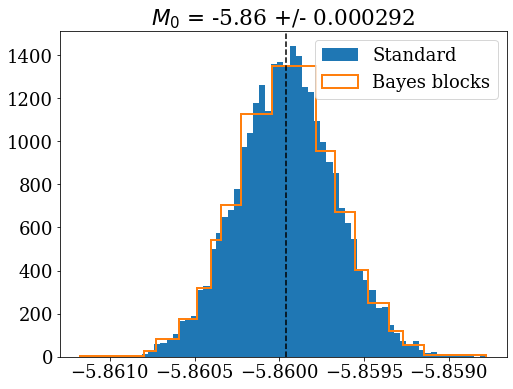

1/variance =  11714566.391056199
[-5.86117343 -5.86079611 -5.86072586 -5.86059106 -5.86048537 -5.86040426
 -5.86034233 -5.86022634 -5.86004524 -5.85978119 -5.85966879 -5.85955328
 -5.85947562 -5.85935452 -5.85927148 -5.85914607 -5.85877717]


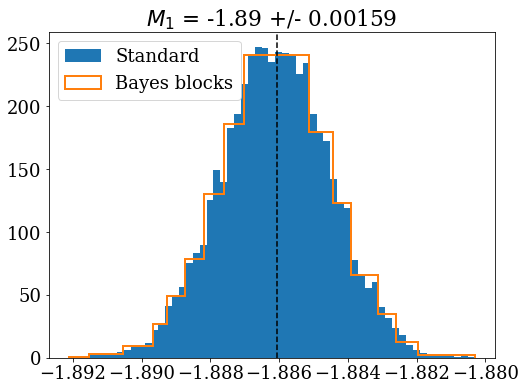

1/variance =  395985.81245735503
[-1.89211056 -1.891533   -1.89054892 -1.88966145 -1.88926116 -1.88872569
 -1.88818303 -1.88759366 -1.88702219 -1.88514083 -1.88442994 -1.88391052
 -1.88312499 -1.88259236 -1.88195803 -1.88030471]


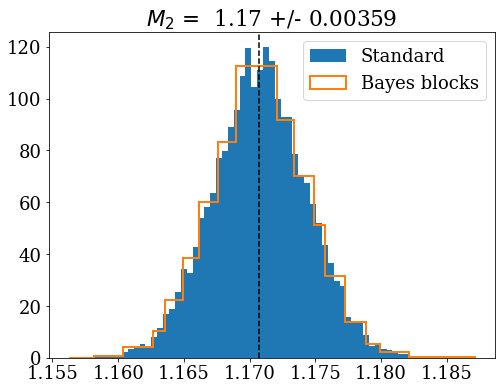

1/variance =  77458.829006114
[1.15625482 1.15819334 1.16038816 1.16265294 1.16356495 1.16495226
 1.16612355 1.16762659 1.1689423  1.17209861 1.17338569 1.17486992
 1.17571734 1.17727031 1.17887104 1.17989149 1.18208672 1.18712501]


In [19]:
# for mi in range(n_params):
for mi in range(3):
    y = mil_vec_array[:,mi]
    blocks = bayesian_blocks_mod(y)
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
    plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    plt.title(fr'$M_{mi}$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdbmil[mi],c='k',ls='--')
    plt.legend()
    plt.show()
    print('1/variance = ',(1/np.std(y))**2)
    print(blocks)

### USDB parameter sample distributions

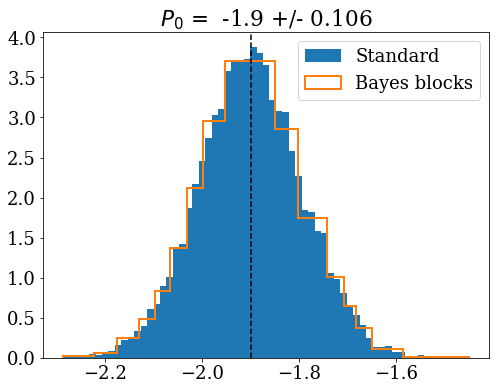

Deleting one bin: width = 0.00023751377114522576


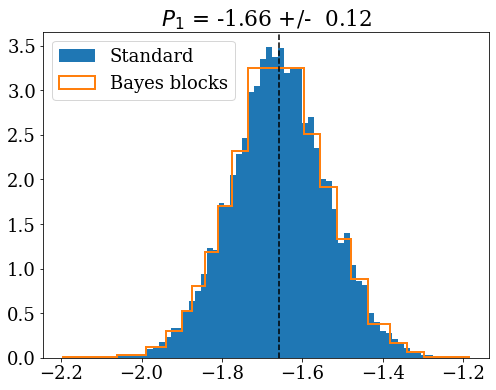

Deleting one bin: width = 0.00026543925388200496


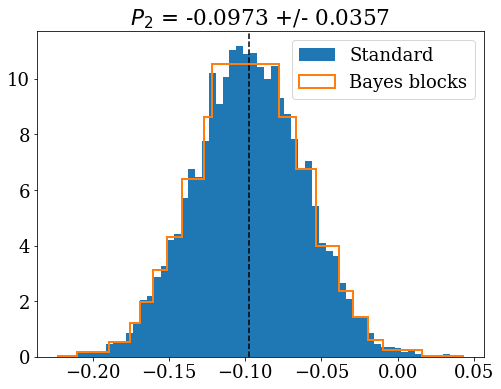

In [20]:
# for pi in range(n_params):
for pi in range(3):
    y = int_vec_array[:,pi]
    blocks = bayesian_blocks_mod(y)
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
    plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    plt.title(fr'$P_{pi}$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdb[pi],c='k',ls='--')
    plt.legend()
    plt.show()

### Shell-model B(GT) distributions 
These are with $g_A = Q = 1$, so just getting an idea of the spreads and distributions.

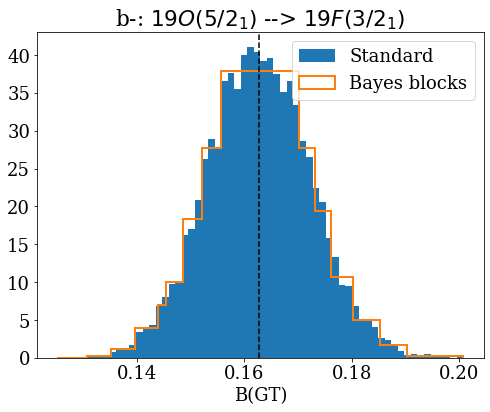

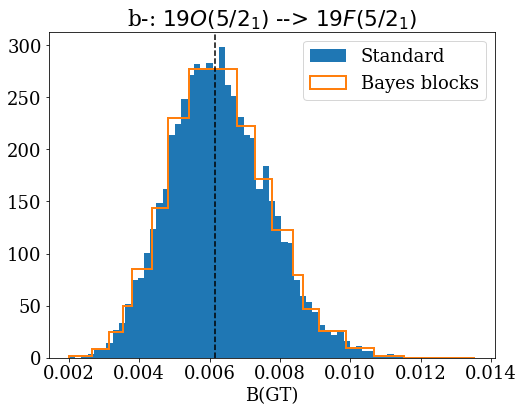

Deleting one bin: width = 0.00035050000000003134
Deleting one bin: width = 2.999999999997449e-05


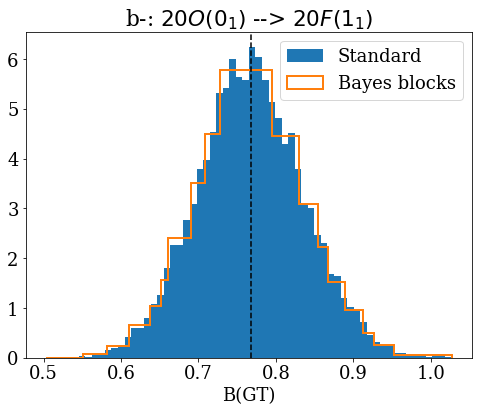

In [21]:
# for ti in range(n_transitions):
for ti in range(3):
    if not df_usdb.iloc[ti]['include']:
        pass
    parent = df_usdb.iloc[ti]['parent']
#     parent_mass = df_usdb.iloc[ti]['Ni'] + df_usdb.iloc[ti]['Zi']
    daughter = df_usdb.iloc[ti]['daughter']
#     daughter_mass = df_usdb.iloc[ti]['Nf'] + df_usdb.iloc[ti]['Zf']
    decay_type = df_usdb.iloc[ti]['decay']
    ji = df_usdb.iloc[ti]['Ji']
    ni = df_usdb.iloc[ti]['ni']
    jf = df_usdb.iloc[ti]['Jf']
    nf = df_usdb.iloc[ti]['nf']
    Bexp = df_usdb.iloc[ti]['Bexp']
    Bexp_unc = df_usdb.iloc[ti]['sigma_B']
    Bth_vec = [df_dict[run_num_string].iloc[ti]['Bth'] for run_num_string in list(df_dict.keys()) ]
#     for run_num_string in list(df_dict.keys()):
#         Bth_vec.append(df_dict[run_num_string].iloc[ti]['Bth'])

    plt.figure(figsize=(8,6))
    plt.hist(Bth_vec,optimal_n_bins(Bth_vec),density=True,label='Standard')
    blocks = bayesian_blocks_mod(Bth_vec)
    plt.hist(Bth_vec, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    title_string = fr'{decay_type}: ${parent}({ji}_{ni})$ --> ${daughter}({jf}_{nf})$'
    plt.title(title_string)
    plt.xlabel('B(GT)')
    plt.axvline(df_usdb['Bth'].iloc[ti],c='k',ls='--')
    plt.legend()
    plt.show()
    
    

In [22]:
def loss(q,df):
    return np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2))

In [23]:
# for df in tqdm(df_dict.values()):
#     df['Bth_gA2'] = df['Bth']*gA**2
#     df['Berr_gA2'] = df['Bexp']-df['Bth_gA2']-1.0*df['Tmirror']
#     df['Berr'] = df['Bexp']-df['Bth']-1.0*df['Tmirror']
#     df['Bresid'] = df['Berr']/np.sqrt(df['sigma_B']**2 + dBap**2)
#     df['Bresid_gA2'] = (df['Bexp']-df['Bth_gA2']-1.0*df['Tmirror'])/np.sqrt(df['sigma_B']**2 + dBap**2)


In [51]:
Bexp_vec = []
Bth_gA2_array = [] # n_samples x n_transitions
B_variance_total = []
for df in tqdm(df_dict.values()):  #loop over samples
    Bth_gA2_array.append(np.array(df['Bth']*gA**2))
Bexp_vec = np.array(df['Bexp'] - 1.0*df['Tmirror'])
B_variance_total = np.array(df['sigma_B']**2 + dBap**2)


100%|██████████| 9997/9997 [00:01<00:00, 5208.36it/s]


In [52]:
Bexp_vec = np.array(Bexp_vec)
Bth_gA2_array = np.array(Bth_gA2_array)
B_variance_total = np.array(B_variance_total)
H_B = np.diag(1/B_variance_total)

In [53]:
Bexp_vec.shape

(56,)

In [93]:
# log likelihood
def log_likelihood(q):
    chi_squared_list = []
    for idx,Bth_sample in enumerate(Bth_gA2_array):
        R = (Bexp_vec - q**2 * Bth_sample)
#         print(R.shape)
        chi_squared_list.append(R.T @ H_B @ R)
    return  - 0.5 * np.mean(chi_squared_list) 

def log_prior(q):
    if (q>0) and (q<1):
        return 0.0
    else:
        return np.log(0)
    
def log_posterior(q):
    return log_likelihood(q) + log_prior(q)

In [94]:
def objective(q):
    return -log_posterior(q)

from scipy.optimize import minimize,minimize_scalar

method = ['L-BFGS-B','TNC','SLSQP','Powell','trust-constr']
opt_result = minimize(objective,0.2,bounds=[(0,1)],method=method[4])
# minimize_scalar(objective,bounds=(0,1),method='bounded')

In [95]:
def second_derivative(f,x,h):
    y = - f(x+2*h) + 16*f(x+h) - 30*f(x) + 16*f(x-h) - f(x-2*h)
    return y/(12*h*h)

In [96]:
C_Q_list = []
step_list = np.logspace(-1,-10,20)
for step in step_list:
    C_Q_list.append(1/second_derivative(objective,opt_result.x,step))

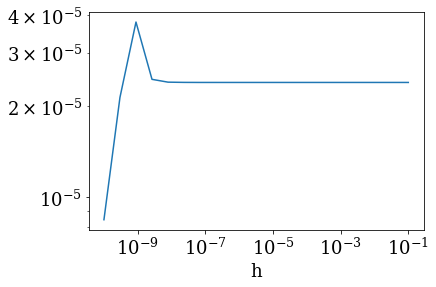

In [97]:
plt.loglog(step_list,C_Q_list)
plt.xlabel('h')
plt.show()

In [98]:
C_Q = 1/second_derivative(objective,opt_result.x,1e-5)
print(f'Standard deviation of Q about optimum = {np.sqrt(C_Q)}')

Standard deviation of Q about optimum = 0.004892853925729231


In [53]:
import emcee
from multiprocessing import Pool
import time

In [68]:
n_walkers = 50
q0 = np.random.rand(n_walkers,1)
with Pool() as pool:
    sampler = emcee.EnsembleSampler(n_walkers, 1, log_posterior, pool=pool)
    start = time.time()
    sampler.run_mcmc(q0, 5000, progress=True,);
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))

  0%|          | 0/5000 [00:00<?, ?it/s]/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launche

Multiprocessing took 1249.6 seconds


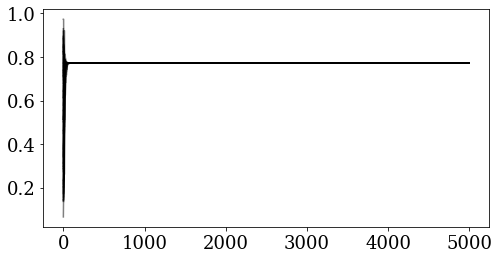

In [69]:
fig, ax = plt.subplots(1, sharex=True,figsize=(8,4))
ax.plot(sampler.chain[:, :, 0].T, '-k', alpha=0.5);
plt.show()

### Quenching factor distribution

In [70]:
# We choose a warm-up time
nwarmup = 500 # warm up

# sampler.chain is of shape (nwalkers, nsteps, ndim)
# we'll throw-out the warmup points and reshape:
emcee_trace = sampler.chain[:, nwarmup:, :].reshape(-1, 1).flatten()
emcee_lnprob = sampler.lnprobability[:, nwarmup:].reshape(-1).flatten()

In [72]:
emcee_trace.shape

(225000,)

Deleting one bin: width = 1.2685006822721334e-07
Deleting one bin: width = 2.6584351164871123e-08
Deleting one bin: width = 2.462749714160495e-07
Deleting one bin: width = 1.8379895327935714e-07
Deleting one bin: width = 6.2053222560365384e-09
Deleting one bin: width = 5.5115324526511245e-09
Deleting one bin: width = 1.3011941524254667e-09
Deleting one bin: width = 5.044290851685673e-08
Deleting one bin: width = 1.3094688666726029e-08
Deleting one bin: width = 9.88632509191234e-10
Deleting one bin: width = 4.013443795081173e-07
Deleting one bin: width = 4.4369598106719366e-08
Deleting one bin: width = 8.944053386805706e-09
Deleting one bin: width = 7.000909851839765e-10
Deleting one bin: width = 1.4997113551018515e-09
Deleting one bin: width = 4.5654853586540867e-07
Deleting one bin: width = 1.7885262926231604e-07
Deleting one bin: width = 6.572520305780927e-12
Deleting one bin: width = 7.432756632397286e-10
Deleting one bin: width = 6.704468780149853e-08
Deleting one bin: width = 2.67

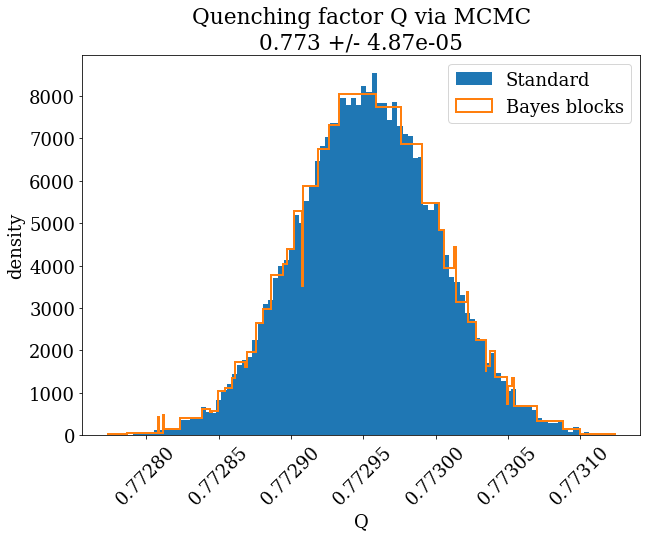

In [77]:
y = emcee_trace[-50000:]
plt.figure(figsize=(10,7))
plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
blocks = bayesian_blocks_mod(y)
plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
q_mean = np.mean(y)
q_std = np.std(y)
plt.title(f"Quenching factor Q via MCMC\n{q_mean:5.3} +/- {q_std:5.3}")
plt.xlabel('Q')
plt.ylabel('density')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### B(GT) histograms, comparison w/ experiment
Each plot shows the shell-model distribution in blue, the USDB prediction in black (with standard deviation given by the distribution, and the experimental value in red.
Note that the uncertainty bands on experiment only include the tabulated experimental uncertainty from the data library and leave out our a priori uncertainty used in the determinaton of the quenching factor.

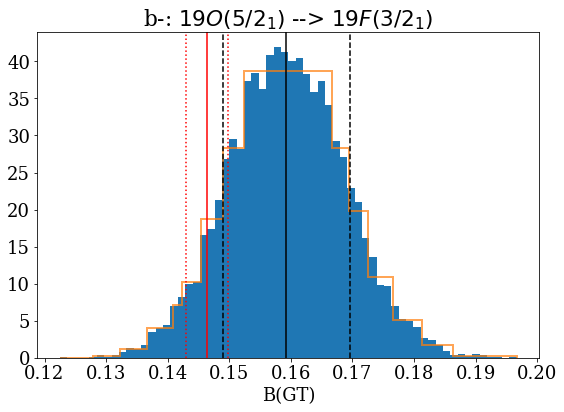

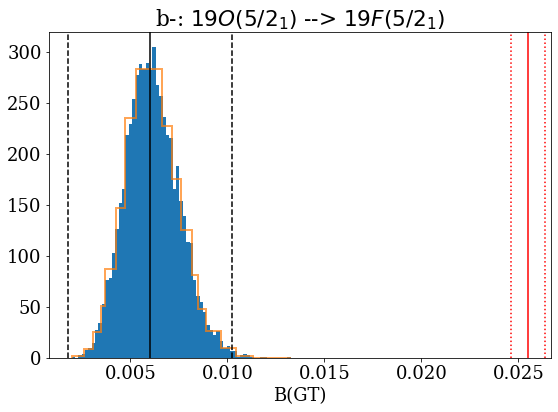

Deleting one bin: width = 0.00034316098860887045
Deleting one bin: width = 2.937183925322273e-05


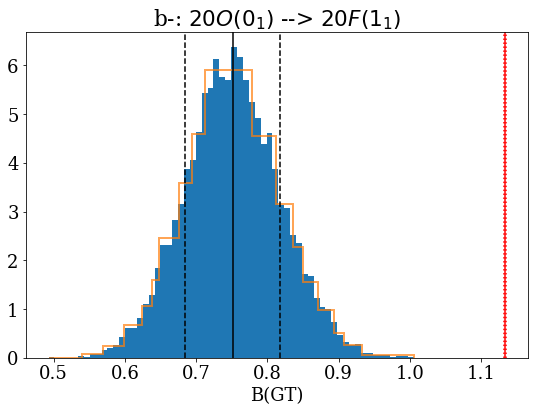

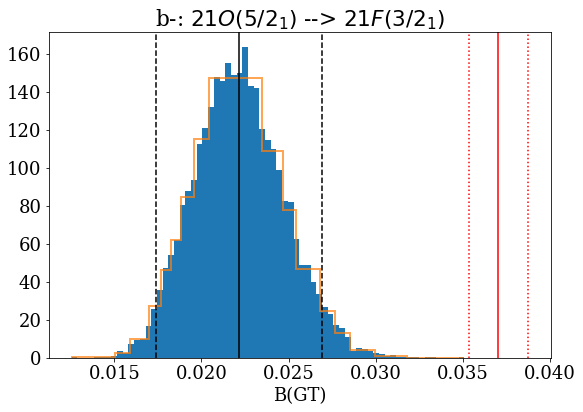

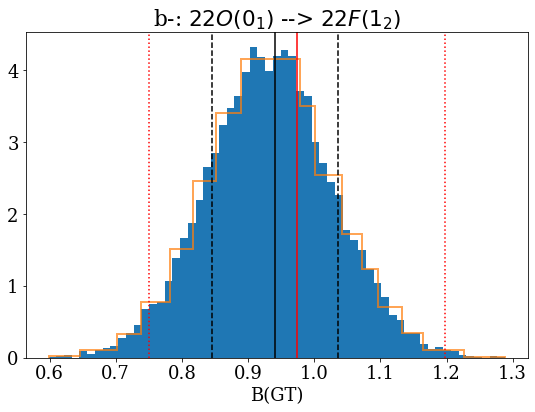

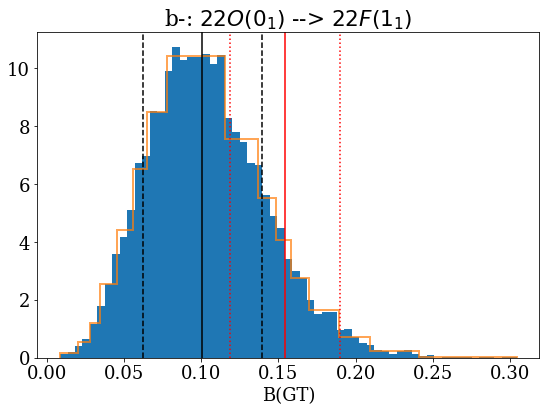

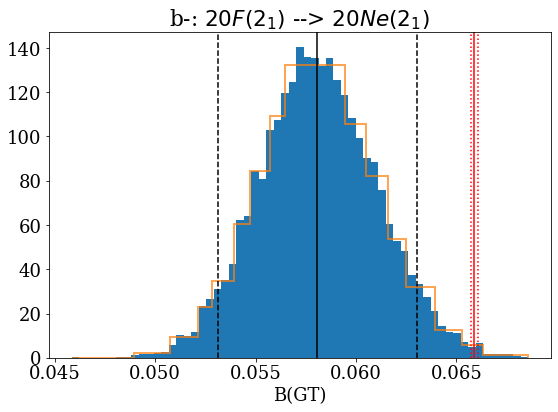

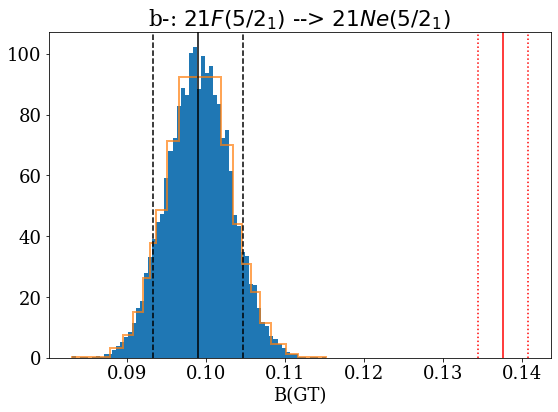

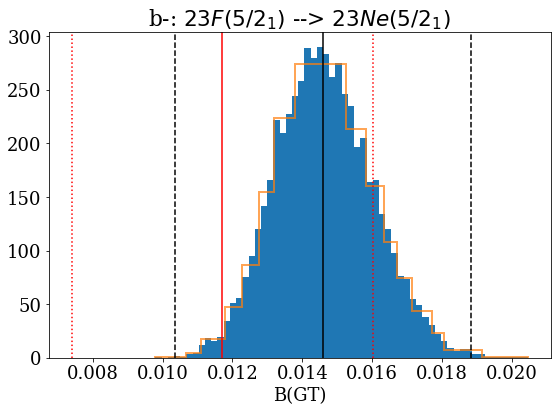

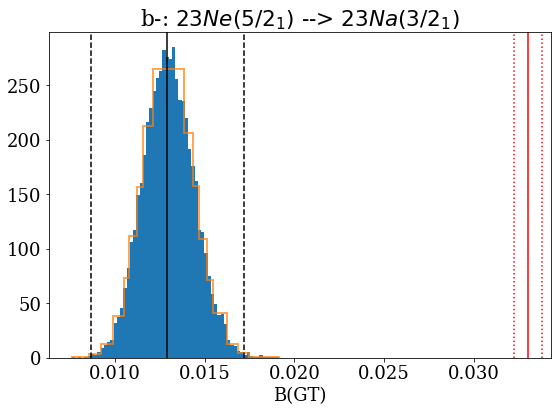

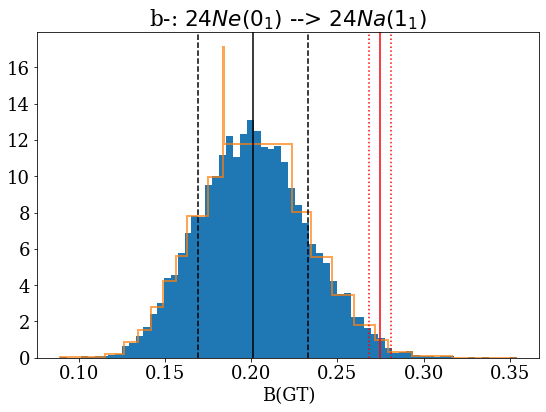

Deleting one bin: width = 1.419638897245945e-05


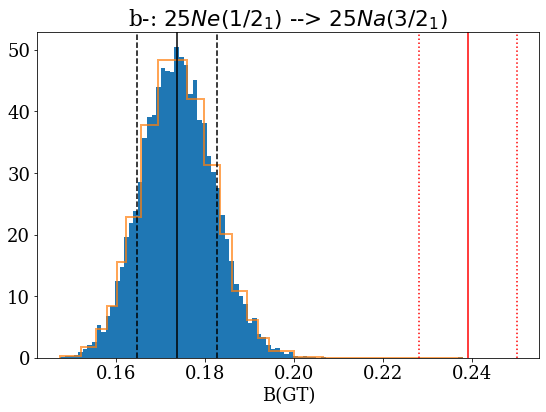

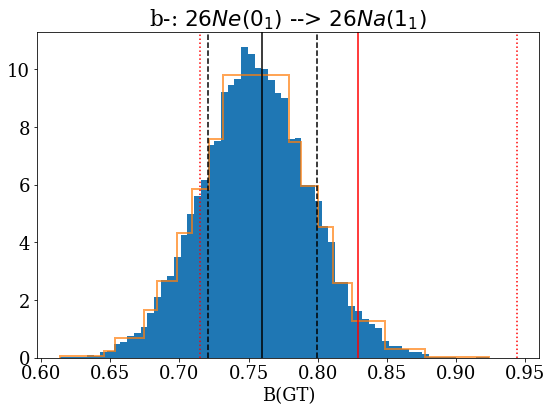

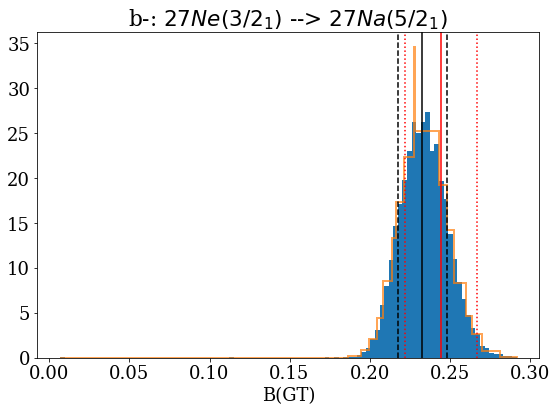

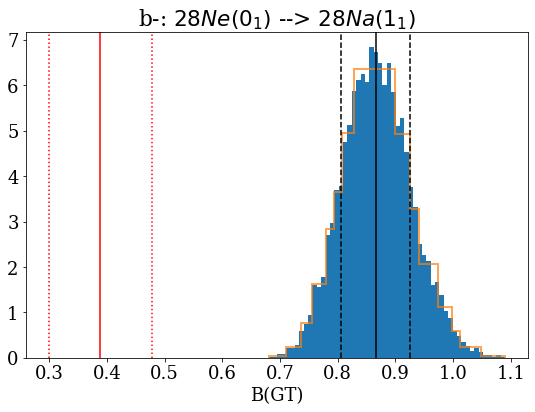

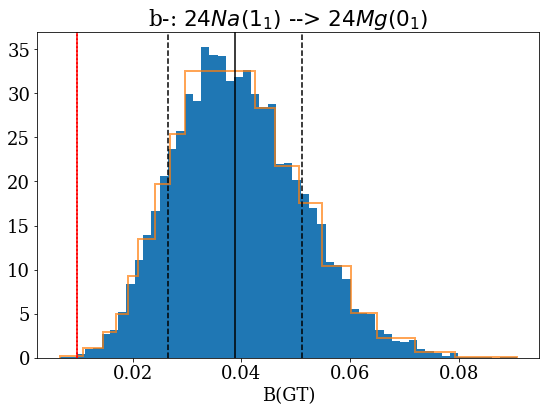

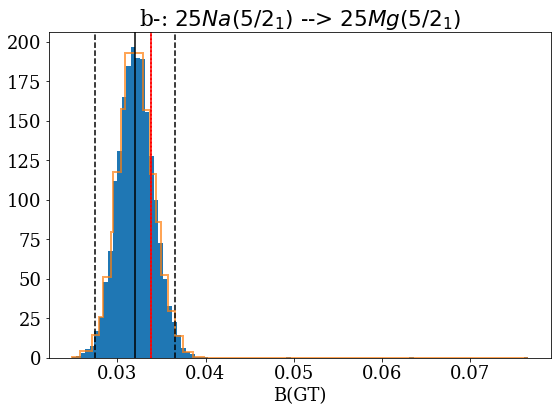

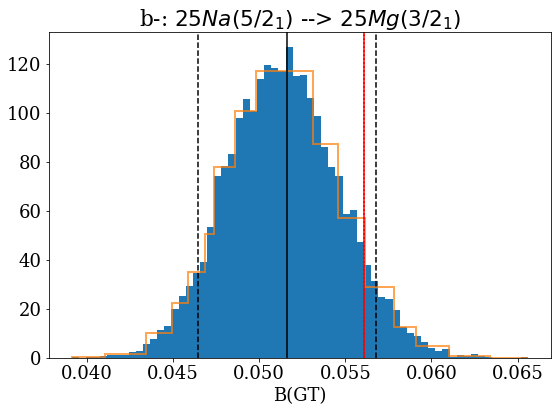

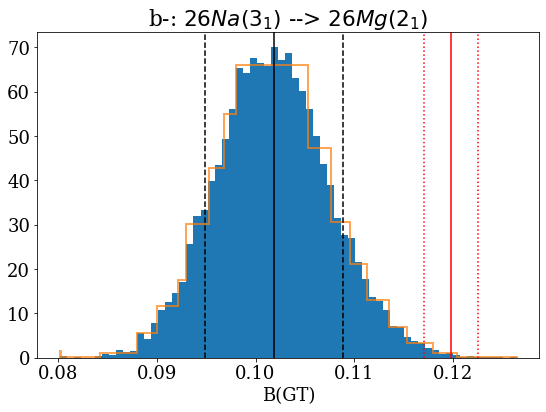

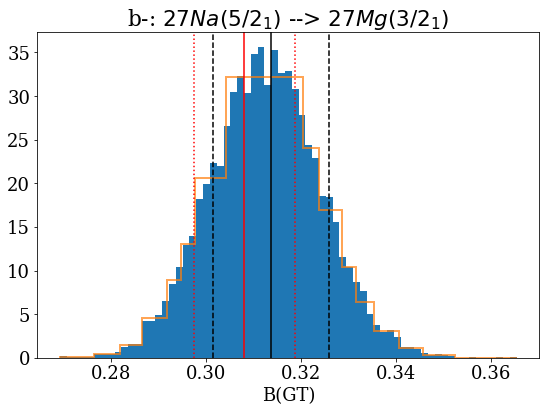

Deleting one bin: width = 2.54555940194523e-05


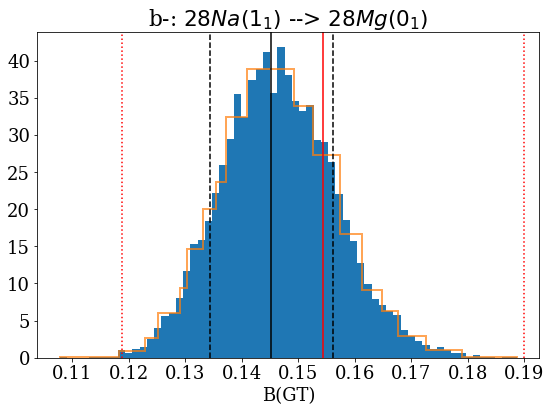

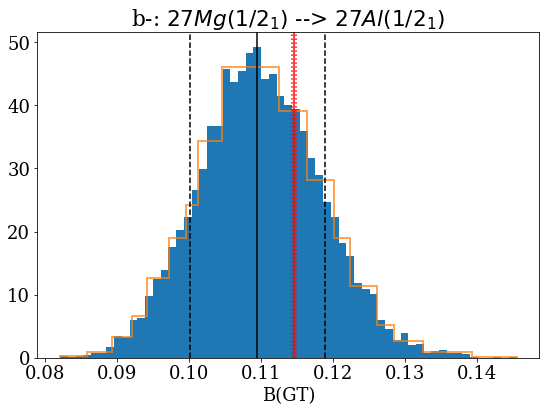

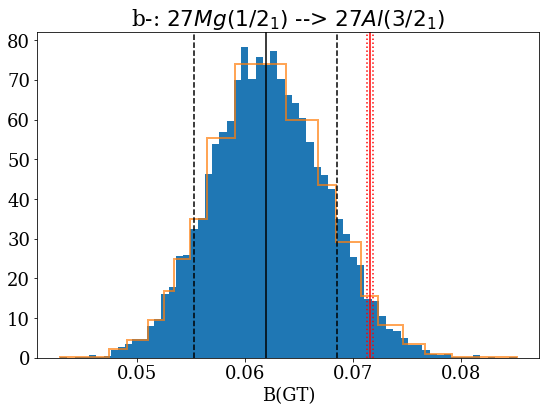

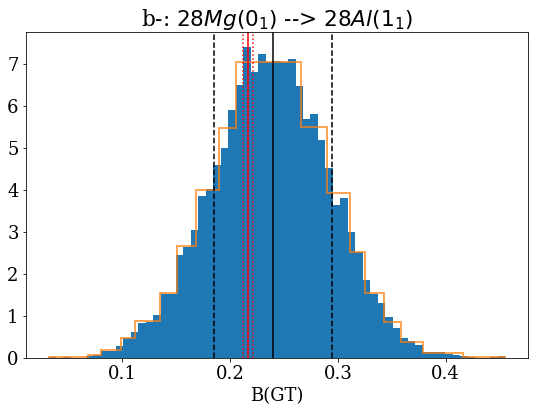

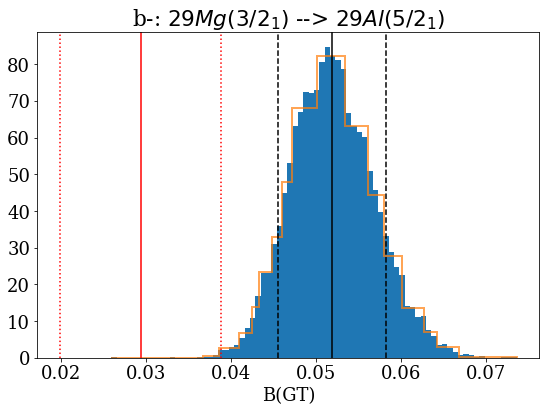

Deleting one bin: width = 1.174873570130226e-05
Deleting one bin: width = 0.0002751162276721647
Deleting one bin: width = 6.95133528993766e-05
Deleting one bin: width = 1.8602164860381798e-05


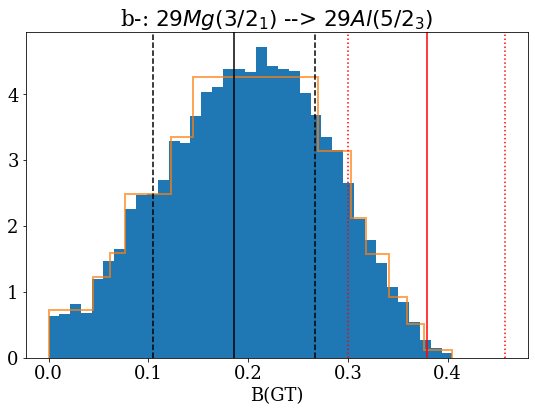

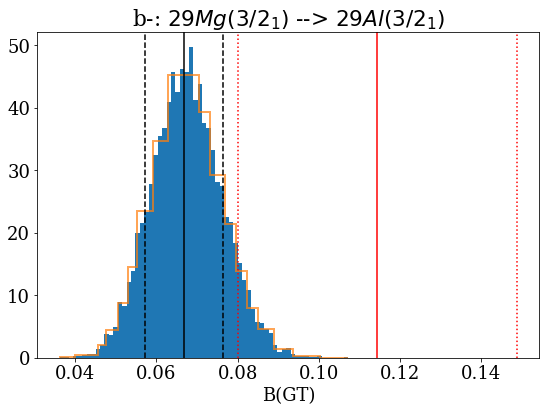

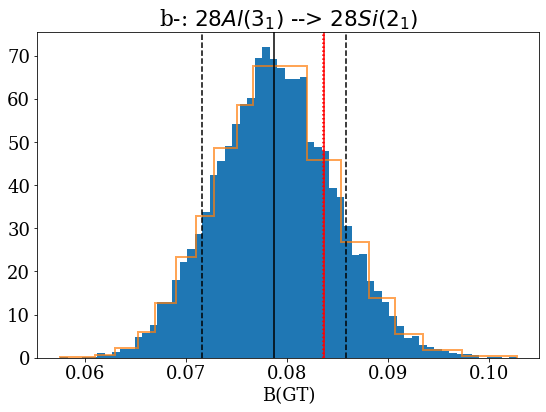

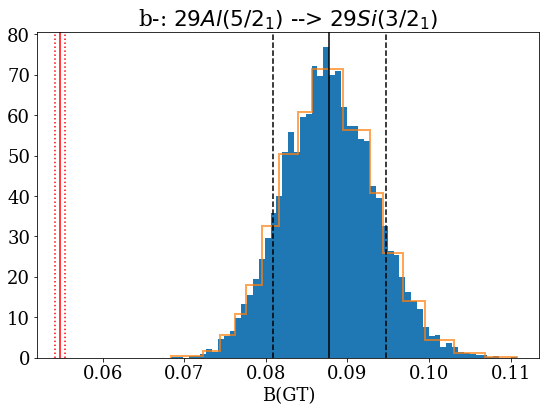

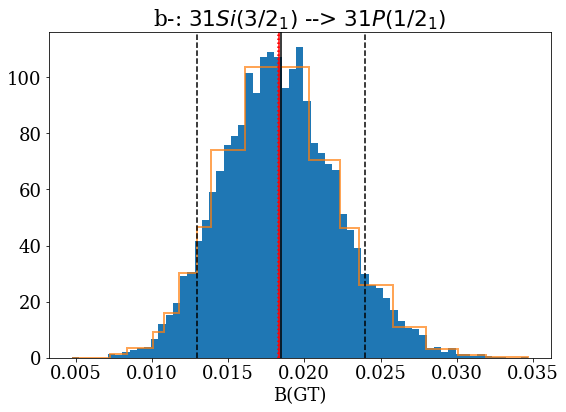

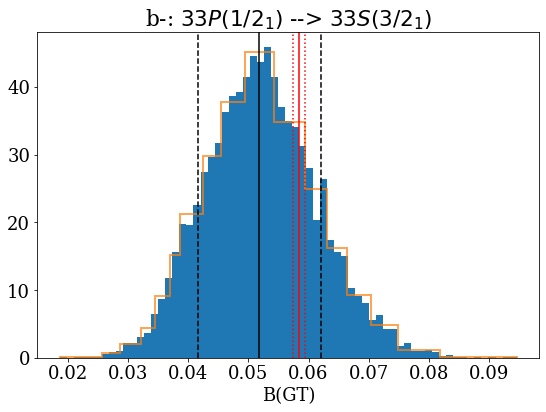

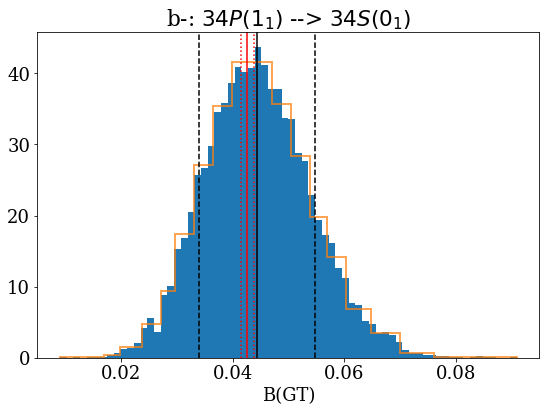

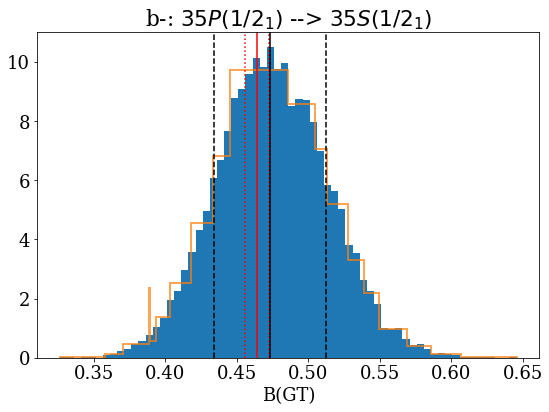

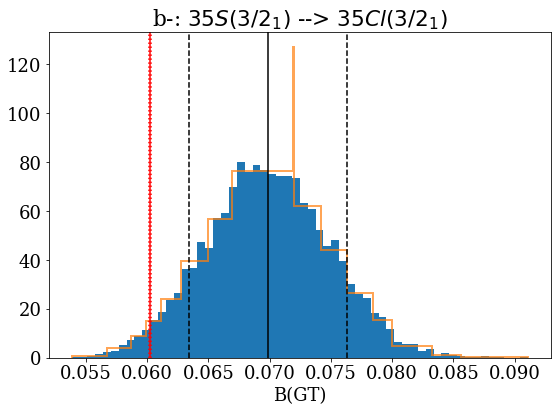

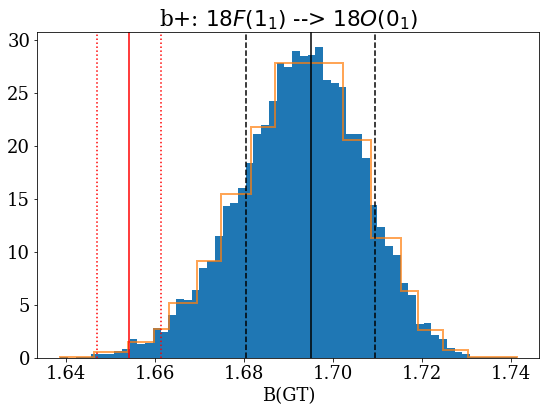

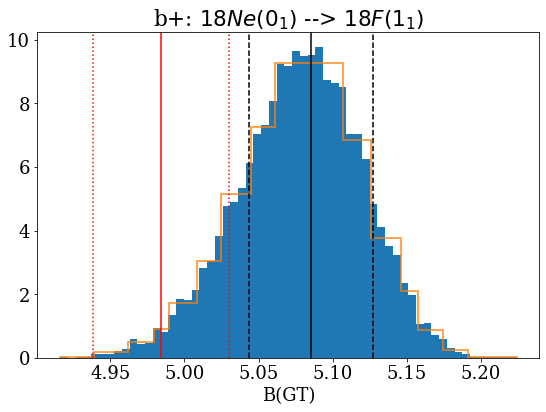

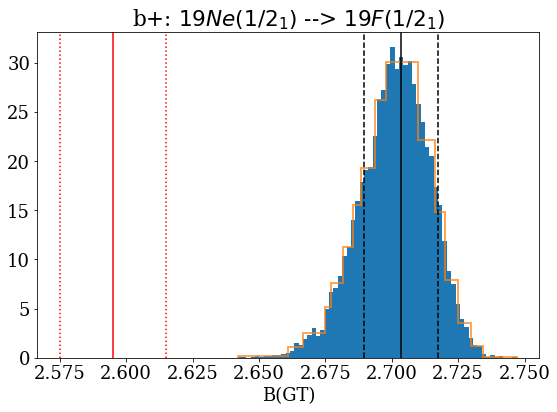

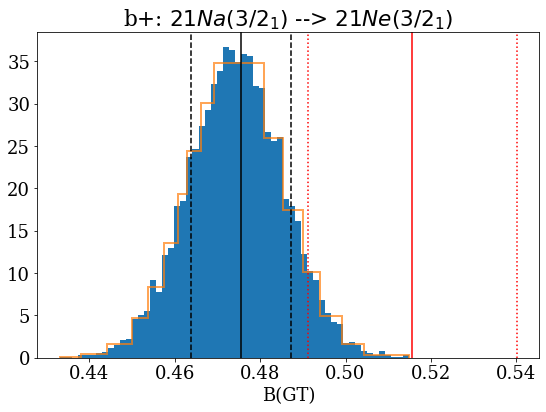

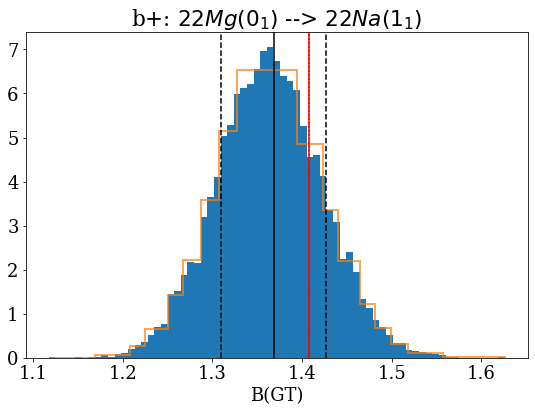

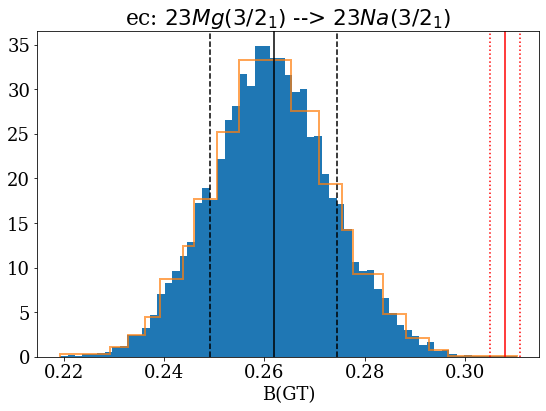

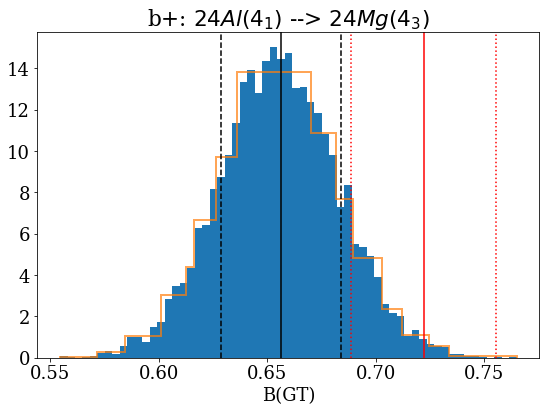

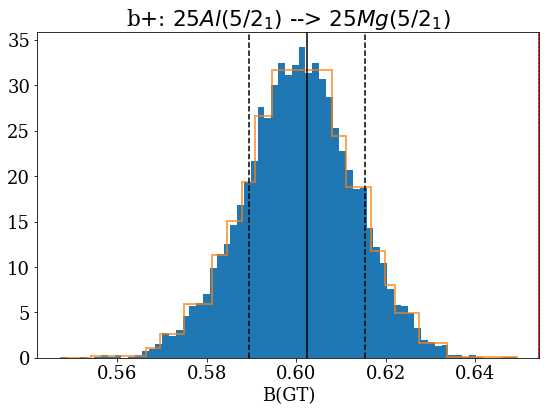

Deleting one bin: width = 0.00038623968618045623


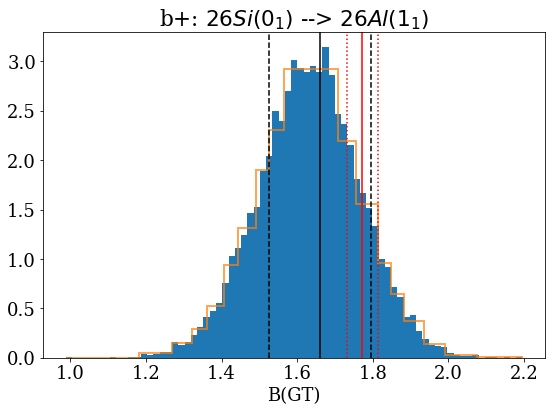

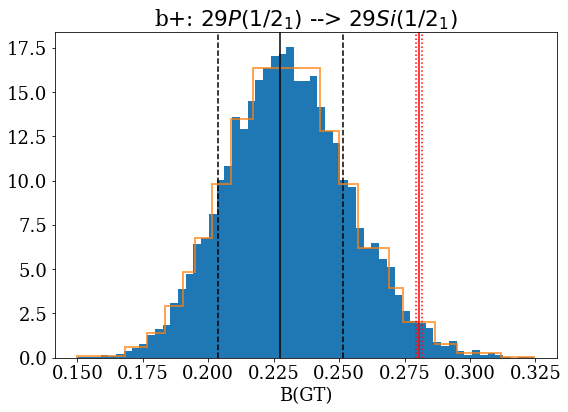

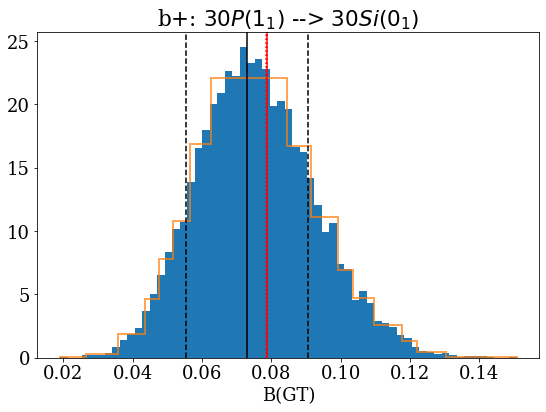

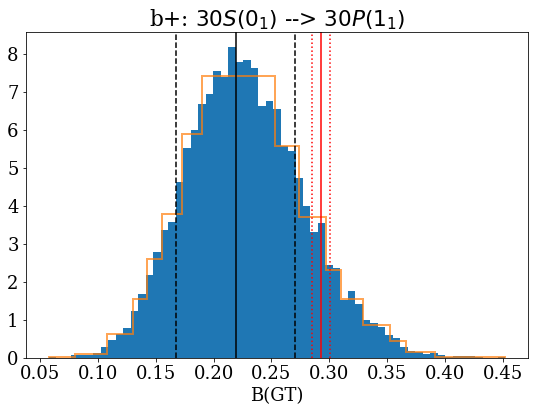

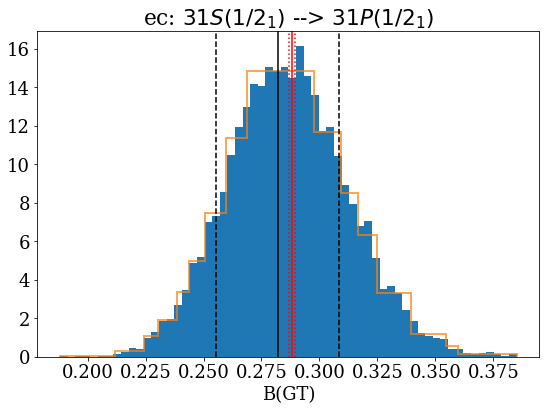

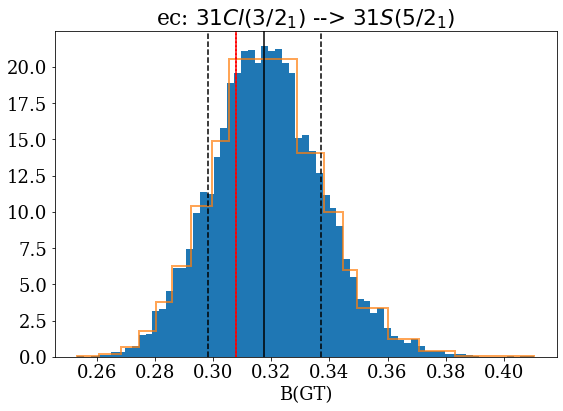

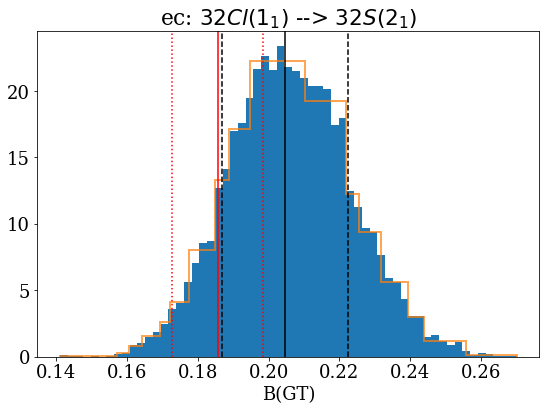

Deleting one bin: width = 8.566786448865882e-05


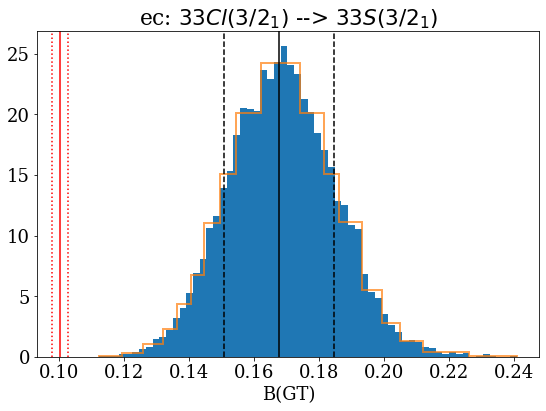

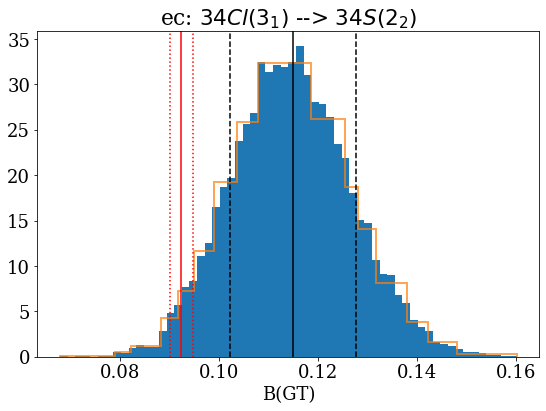

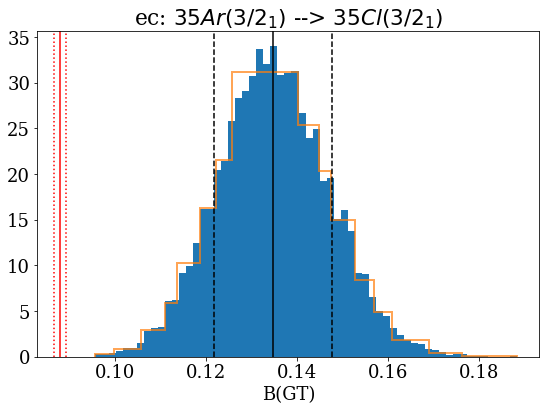

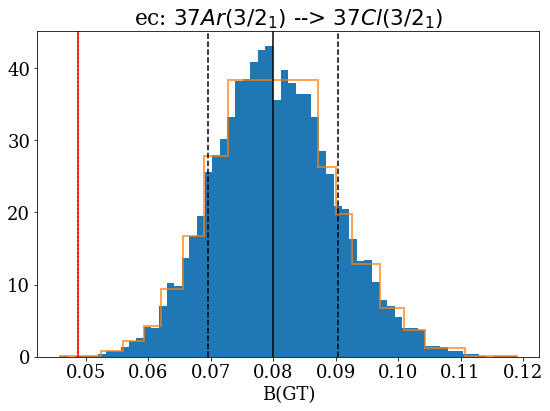

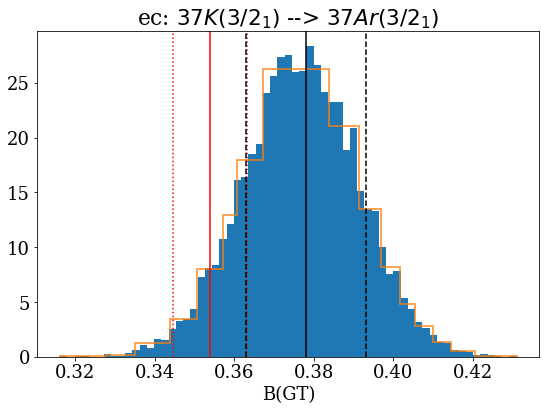

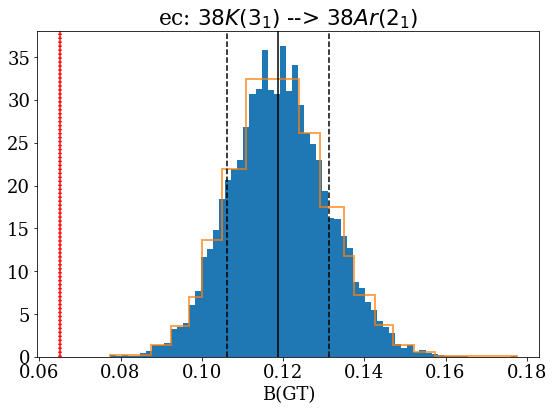

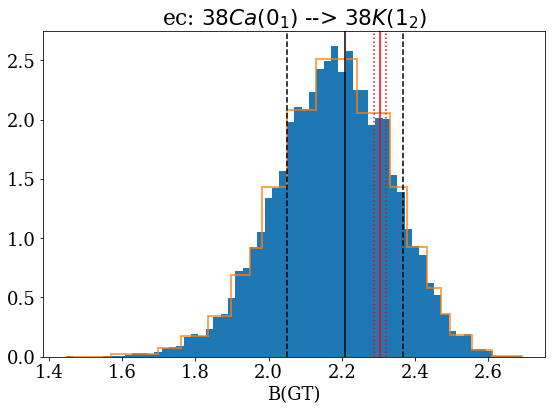

In [35]:
from scipy.stats import skew

skew_array = np.full((n_transitions,2),None)
for ti in range(n_transitions):
    if not df_usdb.iloc[ti]['include']:
        pass
    parent = df_usdb.iloc[ti]['parent']
#     parent_mass = df_usdb.iloc[ti]['Ni'] + df_usdb.iloc[ti]['Zi']
    daughter = df_usdb.iloc[ti]['daughter']
#     daughter_mass = df_usdb.iloc[ti]['Nf'] + df_usdb.iloc[ti]['Zf']
    decay_type = df_usdb.iloc[ti]['decay']
    ji = df_usdb.iloc[ti]['Ji']
    ni = df_usdb.iloc[ti]['ni']
    jf = df_usdb.iloc[ti]['Jf']
    nf = df_usdb.iloc[ti]['nf']
    
    Bexp = df_usdb.iloc[ti]['Bexp'] - 1.0*df_usdb.iloc[ti]['Tmirror']
    
#     Bexp_unc = np.sqrt(df_usdb.iloc[ti]['sigma_B']**2 + dBap**2)
    Bexp_unc = df_usdb.iloc[ti]['sigma_B']
    
    Bth_vec = np.array([df_dict[run_num_string].iloc[ti]['Bth_gA2'] for run_num_string in list(df_dict.keys()) ])
#     for run_num_string in list(df_dict.keys()):
#         Bth_vec.append(df_dict[run_num_string].iloc[ti]['Bth'])
    Bth_vec *= q_mean**2
    Bth_usdb = q_mean**2 * df_usdb['Bth_gA2'].iloc[ti]
    Bth_unc = np.sqrt(np.std(Bth_vec)**2 + q_std**2)   ## CHECK DERIVATION
    
    plt.figure(figsize=(9,6))
    plt.hist(Bth_vec,optimal_n_bins(Bth_vec), density=True, label='Standard')
    blocks = bayesian_blocks_mod(Bth_vec)
    plt.hist(Bth_vec, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks',alpha=0.7)
    title_string = fr'{decay_type}: ${parent}({ji}_{ni})$ --> ${daughter}({jf}_{nf})$'
    plt.title(title_string)
    plt.xlabel('B(GT)')
    
    plt.axvline(Bexp,c='r',ls='-')
    plt.axvline(Bexp+Bexp_unc,c='r',ls=':')
    plt.axvline(Bexp-Bexp_unc,c='r',ls=':')
    
    plt.axvline(Bth_usdb,c='k',ls='-')
    plt.axvline(Bth_usdb+Bth_unc,c='k',ls='--')
    plt.axvline(Bth_usdb-Bth_unc,c='k',ls='--')
    
    plt.show()
    
    
    if 'b-' in decay_type:
        skew_array[ti,:] = np.array([skew(Bth_vec),-1])
    else:
        skew_array[ti,:] = np.array([skew(Bth_vec),+1])

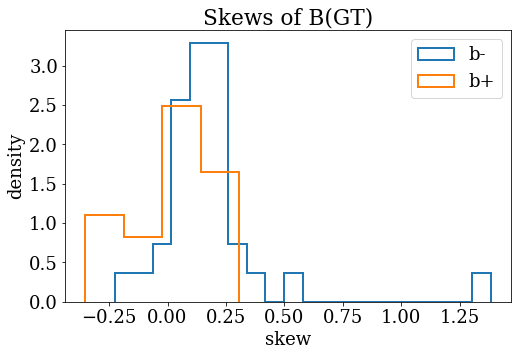

b- mean skew =  0.178351674757888
b+ mean skew =  0.04908937615057414
total mean skew =  0.12757005744787184


In [55]:
skew_bm = skew_array[skew_array[:,1]<0,0]
skew_bp = skew_array[skew_array[:,1]>0,0]

plt.figure(figsize=(8,5))
plt.hist(skew_bm,bins=optimal_n_bins(skew_bm),density=True,label='b-',histtype='step',linewidth=2)
plt.hist(skew_bp,bins=optimal_n_bins(skew_bp),density=True,label='b+',histtype='step',linewidth=2)
# plt.hist(skew_bm,bins=bayesian_blocks_mod(skew_bm),density=True,label='b-',histtype='step',linewidth=2)
# plt.hist(skew_bp,bins=bayesian_blocks_mod(skew_bp),density=True,label='b+',histtype='step',linewidth=2)
plt.title('Skews of B(GT)')
plt.xlabel('skew')
plt.ylabel('density')
plt.legend()
plt.show()

print('b- mean skew = ', np.mean(skew_bm))
print('b+ mean skew = ', np.mean(skew_bp))
print('total mean skew = ', np.mean(skew_array[:,0]))